In [ ]:
# Use the aggregated hoshi_workflow namespace for imports
import hoshi_workflow.hoshi_reader as hr
import importlib

# If you edit the underlying module and want to reload in a running
# notebook kernel, reload the module object referenced by `hr`:
importlib.reload(hr)
import matplotlib.pyplot as plt
import numpy as np

In [43]:
path = "/home/tanby/repos/HOSHI_WorkFlow/simulations/pop3_20M"

In [44]:
hm = hr.HOSHI_Reader(path)

In [45]:
history = hr.HoshiHistory(hm.summary_dir)
history.count_runs()
history.list_runs()

[{'index': 1,
  'header': '# 1:stg 2:jcma 3:nmlo  4:ndv         5:time        6:dtime         7:Mtot         8:Etot         9:Jtot     10:dMdt     11:frot   12:dens_c   13:temp_c    14:Rsurf    15:Lsurf     16:Teff     17:vrot    18:[N/H]     19:Gedd  20:gam_ave 21:mach_max     22:Brad    23:fconf    24:fbrak    25:eta_B26:omgs[d-1]27:omgc[d-1]     28:Lnuc      29:Lnu     30:Lrad',
  'start_line': 0,
  'end_line': 38,
  'var_names': ['stg',
   'jcma',
   'nmlo',
   'ndv',
   'time',
   'dtime',
   'Mtot',
   'Etot',
   'Jtot',
   'dMdt',
   'frot',
   'dens_c',
   'temp_c',
   'Rsurf',
   'Lsurf',
   'Teff',
   'vrot',
   '[N/H]',
   'Gedd',
   'gam_ave',
   'mach_max',
   'Brad',
   'fconf',
   'fbrak',
   'eta_B',
   'omgs[d-1]',
   'omgc[d-1]',
   'Lnuc',
   'Lnu',
   'Lrad']},
 {'index': 2,
  'header': '# 1:stg 2:jcma 3:nmlo  4:ndv         5:time        6:dtime         7:Mtot         8:Etot         9:Jtot     10:dMdt     11:frot   12:dens_c   13:temp_c    14:Rsurf    15:Lsurf     1

In [46]:
df = history.read_run()

/home/tanby/repos/HOSHI_WorkFlow/src/HOSHI_Reader/HOSHI_Reader.py:189: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [47]:
print(df)

         stg  jcma  nmlo     ndv          time         dtime      Mtot  \
0        1.0   0.0   0.0  1024.0  0.000000e+00  1.300000e+10  20.00000   
1        2.0   0.0   0.0  1024.0  0.000000e+00  1.690000e+10  20.00000   
2        3.0   0.0   0.0  1024.0  0.000000e+00  2.197000e+10  20.00000   
3        4.0   0.0   0.0  1024.0  0.000000e+00  2.856100e+10  20.00000   
4        5.0   0.0   0.0  1024.0  0.000000e+00  3.712930e+10  20.00000   
...      ...   ...   ...     ...           ...           ...       ...   
2463  2464.0   6.0   5.0  1024.0  2.832110e+14  8.013803e+00  19.98911   
2464  2465.0   6.0   5.0  1024.0  2.832110e+14  5.027385e+00  19.98911   
2465  2466.0   6.0   5.0  1024.0  2.832110e+14  3.229643e+00  19.98911   
2466  2467.0   6.0   5.0  1024.0  2.832110e+14  1.380128e+00  19.98911   
2467  2468.0   6.0   5.0  1024.0  2.832110e+14  1.035096e-01  19.98911   

              Etot  Jtot          dMdt  ...  mach_max  Brad  fconf  fbrak  \
0    -4.998642e+50   0.0  0.000000

Text(0, 0.5, 'Temperature [K]')

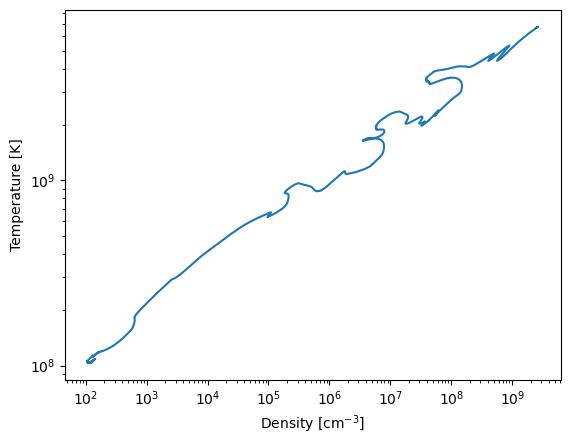

In [ ]:
plt.plot(df.dens_c, df.temp_c)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Density [cm$^{-3}$]")
plt.ylabel("Temperature [K]")

In [49]:
profile = hr.HoshiProfile(hm.writestr_dir, 2468)
print(profile.var_names)

['j', 'cv', 'EOS', 'Mr', 'dMr', 'dMr*frq', 'Radius', 'Lum', 'Vel', 'Pres', 'Dens', 'Temp', 'entropy', 'gamma', 'sound', 'eint', 'Yi', 'Ye', 'X(D)', 'X(p)', 'X(He)', 'X(C)', 'X(N)', 'X(O)', 'X(Ne)', 'X(Mg)', 'X(Si)', 'X(Fe)', 'ang.mom.', 'ang.vel.', 'epg', 'epn', 'epnu', 'opacity', 'n_ad', 'n_rad', 'n_cv', 'n_mu', 'Dthm', 'Dchem', 'gam_rad', 'Brad', 'Bphi', 'vcv', 'lcv', 'alpha', 'Beq']


In [38]:
dens = profile.data("Dens")
temp = profile.data("Temp")
mass = profile.data("Mr")

/home/tanby/repos/HOSHI_WorkFlow/src/HOSHI_Reader/HOSHI_Reader.py:292: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  comment='#',
/home/tanby/repos/HOSHI_WorkFlow/src/HOSHI_Reader/HOSHI_Reader.py:292: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  comment='#',
/home/tanby/repos/HOSHI_WorkFlow/src/HOSHI_Reader/HOSHI_Reader.py:292: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  comment='#',


Text(0.5, 0, 'Mass [M$_{\\odot}$]')

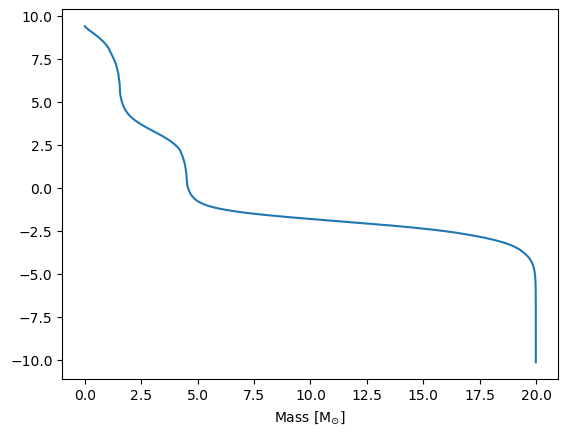

In [ ]:
plt.plot(mass, np.log10(dens))
plt.xlabel("Mass [M$_{\\odot}$]")
# plt.ylabel("Density [g/cm$^{-3}$]")

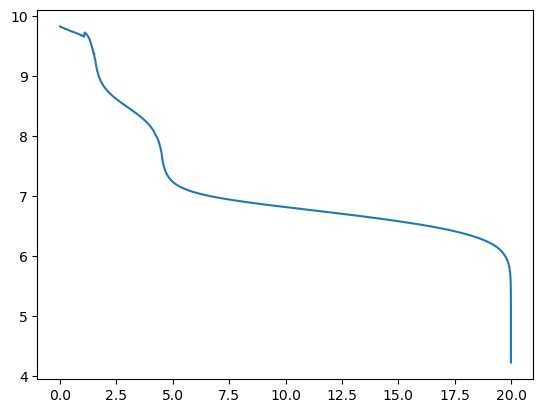

In [53]:
plt.plot(mass, np.log10(temp))

/home/tanby/repos/HOSHI_WorkFlow/src/HOSHI_Reader/HOSHI_Reader.py:292: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  comment='#',
/home/tanby/repos/HOSHI_WorkFlow/src/HOSHI_Reader/HOSHI_Reader.py:292: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  comment='#',
/home/tanby/repos/HOSHI_WorkFlow/src/HOSHI_Reader/HOSHI_Reader.py:292: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  comment='#',
/home/tanby/repos/HOSHI_WorkFlow/src/HOSHI_Reader/HOSHI_Reader.py:292: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  comment='#',
/home/tanby/repos/HOSHI_WorkFlow/src/HOSHI_Reader/HOSHI_Reader.py:292: FutureWarning: Th

(0.0001, 2)

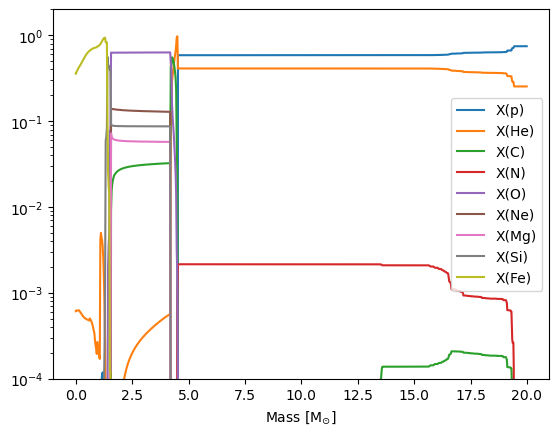

In [57]:
nucs = ["X(p)", "X(He)", "X(C)", "X(N)", "X(O)", "X(Ne)", "X(Mg)", "X(Si)", "X(Fe)"]
for nuc in nucs:
    plt.plot(mass, profile.data(nuc), label=nuc)
plt.xlabel("Mass [M$_{\\odot}$]")
plt.yscale("log")
plt.legend()

plt.ylim(1e-4, 2)